In [21]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Loss study - "Both at the same time - Mamba"

In [22]:
with open("1ksample_20part_T200_100epoch.pkl", "rb") as file:
    data = pickle.load(file)

In [26]:
data_list = []
for i in data:
    d = pd.DataFrame(i)
    d["epoch"] = np.arange(10)+1
    data_list.append(d)
data = pd.concat(data_list)

In [27]:
data

,bi_mamba_stacks,conv_stack,dropout,learning_rate,total_loss,running_classification_total_loss,running_regression_total_loss,epoch
0,1,1,0.05,0.010,0.947144,0.744130,0.203013,1
1,1,1,0.05,0.010,0.678146,0.492092,0.186054,2
2,1,1,0.05,0.010,0.637493,0.452362,0.185132,3
3,1,1,0.05,0.010,0.648172,0.462547,0.185624,4
4,1,1,0.05,0.010,0.601194,0.461733,0.139461,5
...,...,...,...,...,...,...,...,...
5,20,20,0.15,0.001,0.984700,0.839920,0.144781,6
6,20,20,0.15,0.001,0.981767,0.836572,0.145195,7
7,20,20,0.15,0.001,0.980586,0.835084,0.145501,8
8,20,20,0.15,0.001,0.988450,0.842733,0.145717,9


In [28]:
import seaborn as sns

## Classification loss - leargning rate 1e-2

Text(0.5, 0.98, 'Classification loss - learning rate 1e-2')

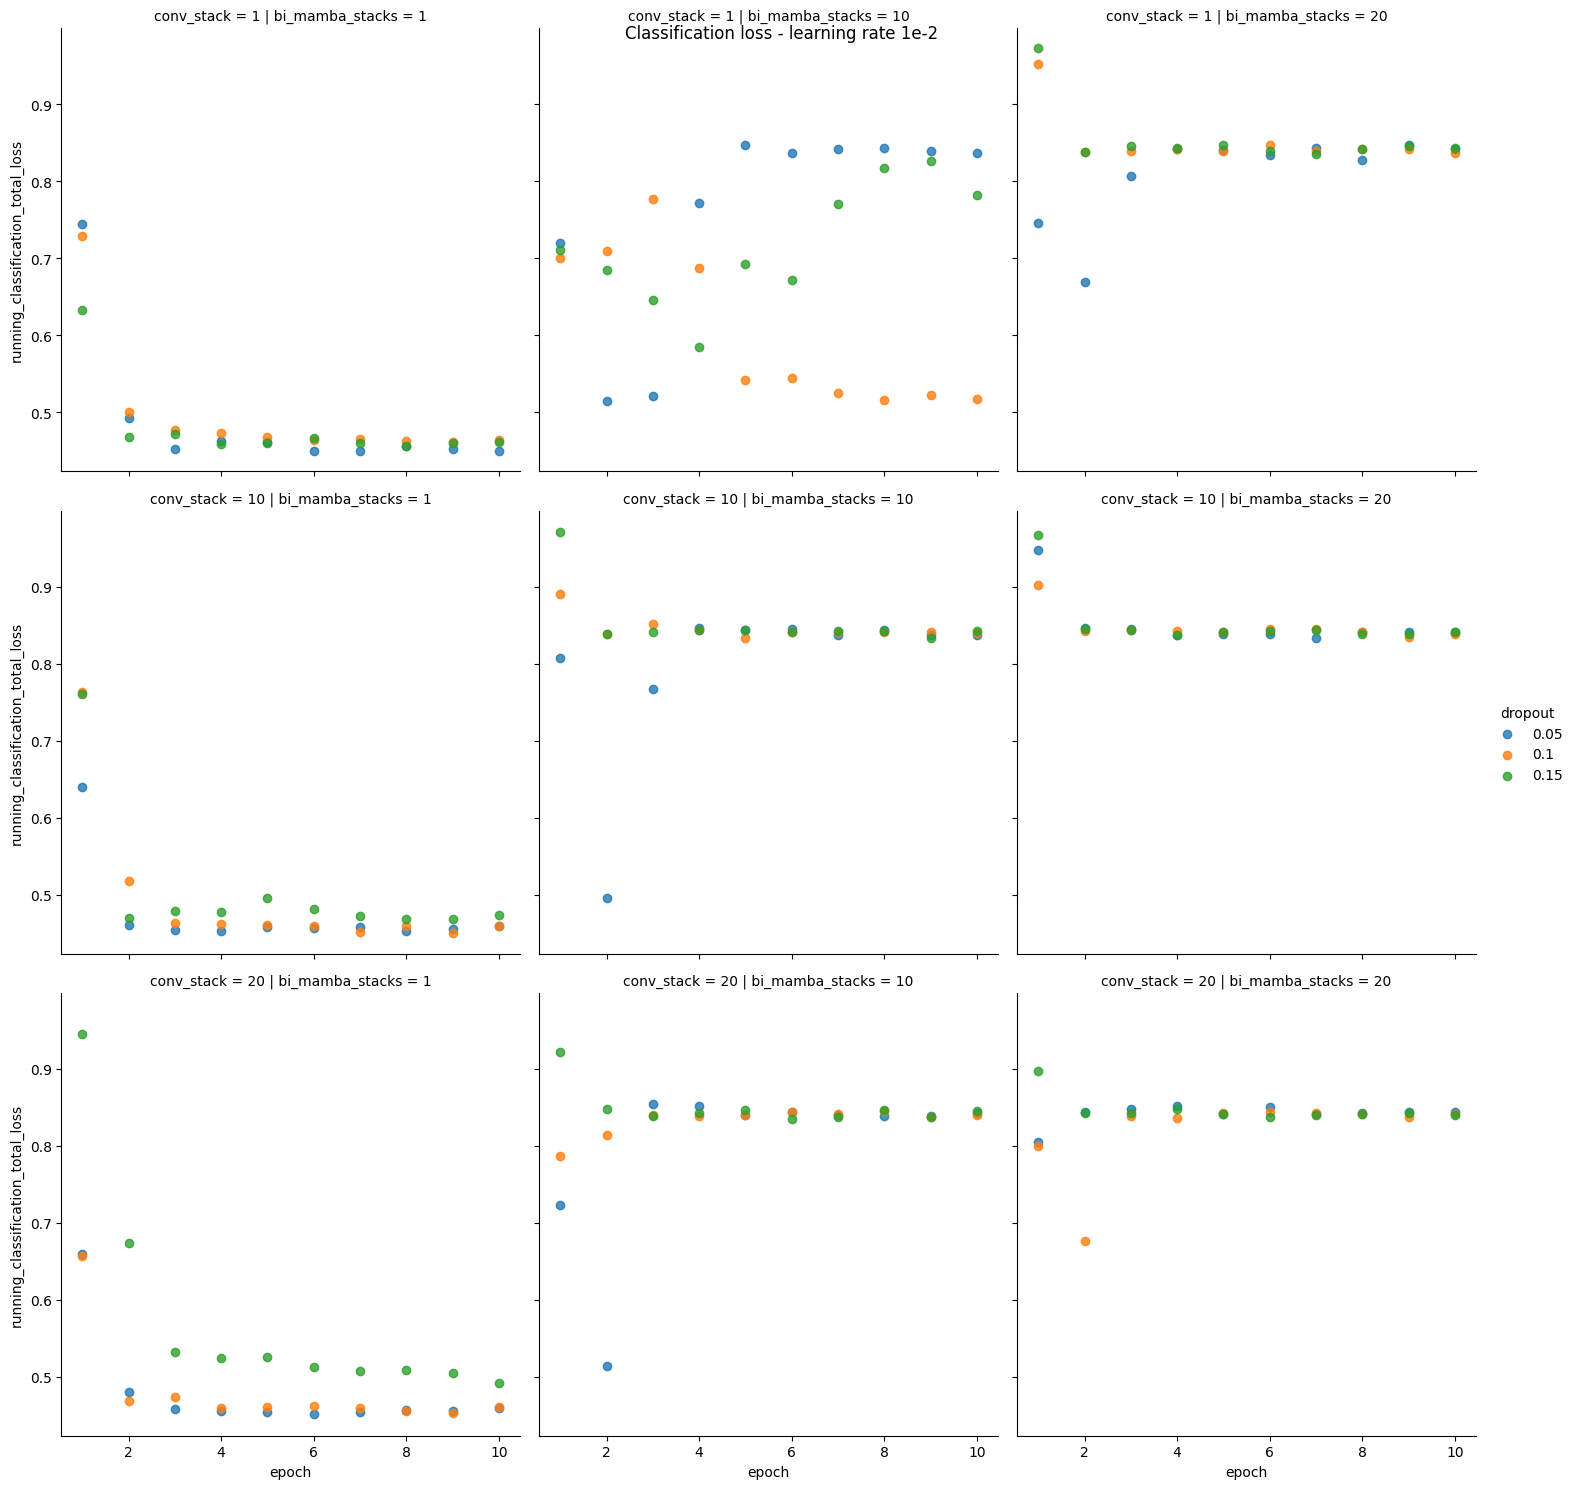

In [49]:

sns.lmplot(
    data=data[data["learning_rate"] == 0.01],
    x="epoch",
    y="running_classification_total_loss",
    # col_wrap=2,
    hue="dropout",
    col="bi_mamba_stacks",
    row="conv_stack",
    fit_reg=False,
    # scatter=Falsee
    line_kws={'lw': 10},
    # scatter_kws={"s":0}

)

plt.suptitle("Classification loss - learning rate 1e-2")

## Classification loss - leargning rate 1e-3

Text(0.5, 0.98, 'Classification loss - learning rate 1e-3')

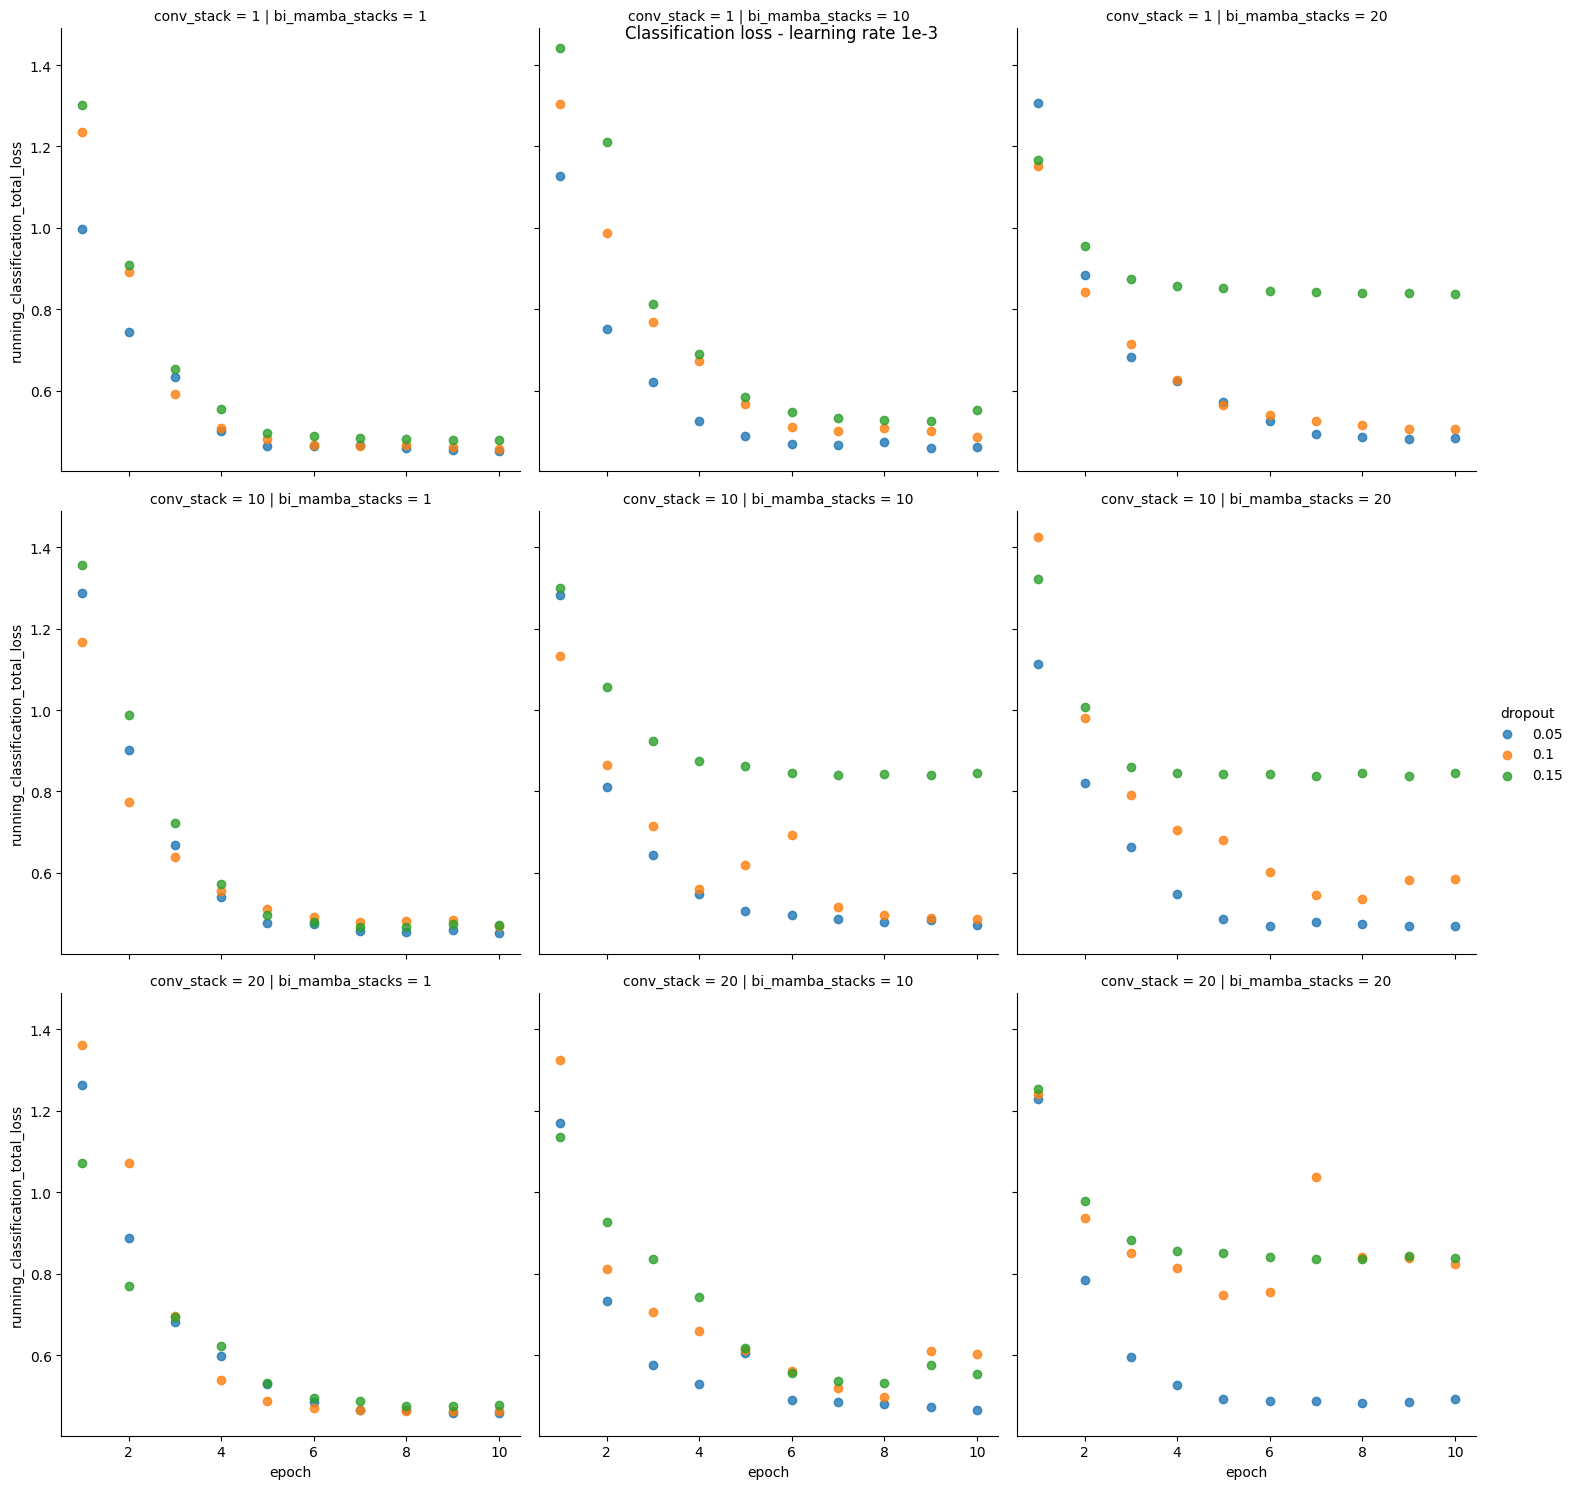

In [50]:

sns.lmplot(
    data=data[data["learning_rate"] == 0.001],
    x="epoch",
    y="running_classification_total_loss",
    # col_wrap=2,
    hue="dropout",
    col="bi_mamba_stacks",
    row="conv_stack",
    fit_reg=False,
    # scatter=Falsee
    line_kws={'lw': 10},
    # scatter_kws={"s":0}

)

plt.suptitle("Classification loss - learning rate 1e-3")

Première chose, on voit que les plus gros modele ont besoin d'un plus plus petit learning rate afin de pouvoir apprendre correctement. Il ne permette pas d'avoir une loss moins importante que le plus petit des modèles mais sont beaucoup plus sensible au pourcentage de dropout lors de l'entrainement. Il semble que la quantité de convolution stack n'influe que très peu sur la classification alors que c'est la qu'il est utilisé. Il semble cependent augmenter le temps nécessaire à l'entrainement. Il n'est pas sensible au dropout, c'est normal, il n'y en a pas dans les couches de convolution (peut être à corriger !)

## Regression loss

Pour ce qui est de la regression, le nombre de convolution n'importe pas et on va donc regarder seulement les cas  avec une seule couche de convolution

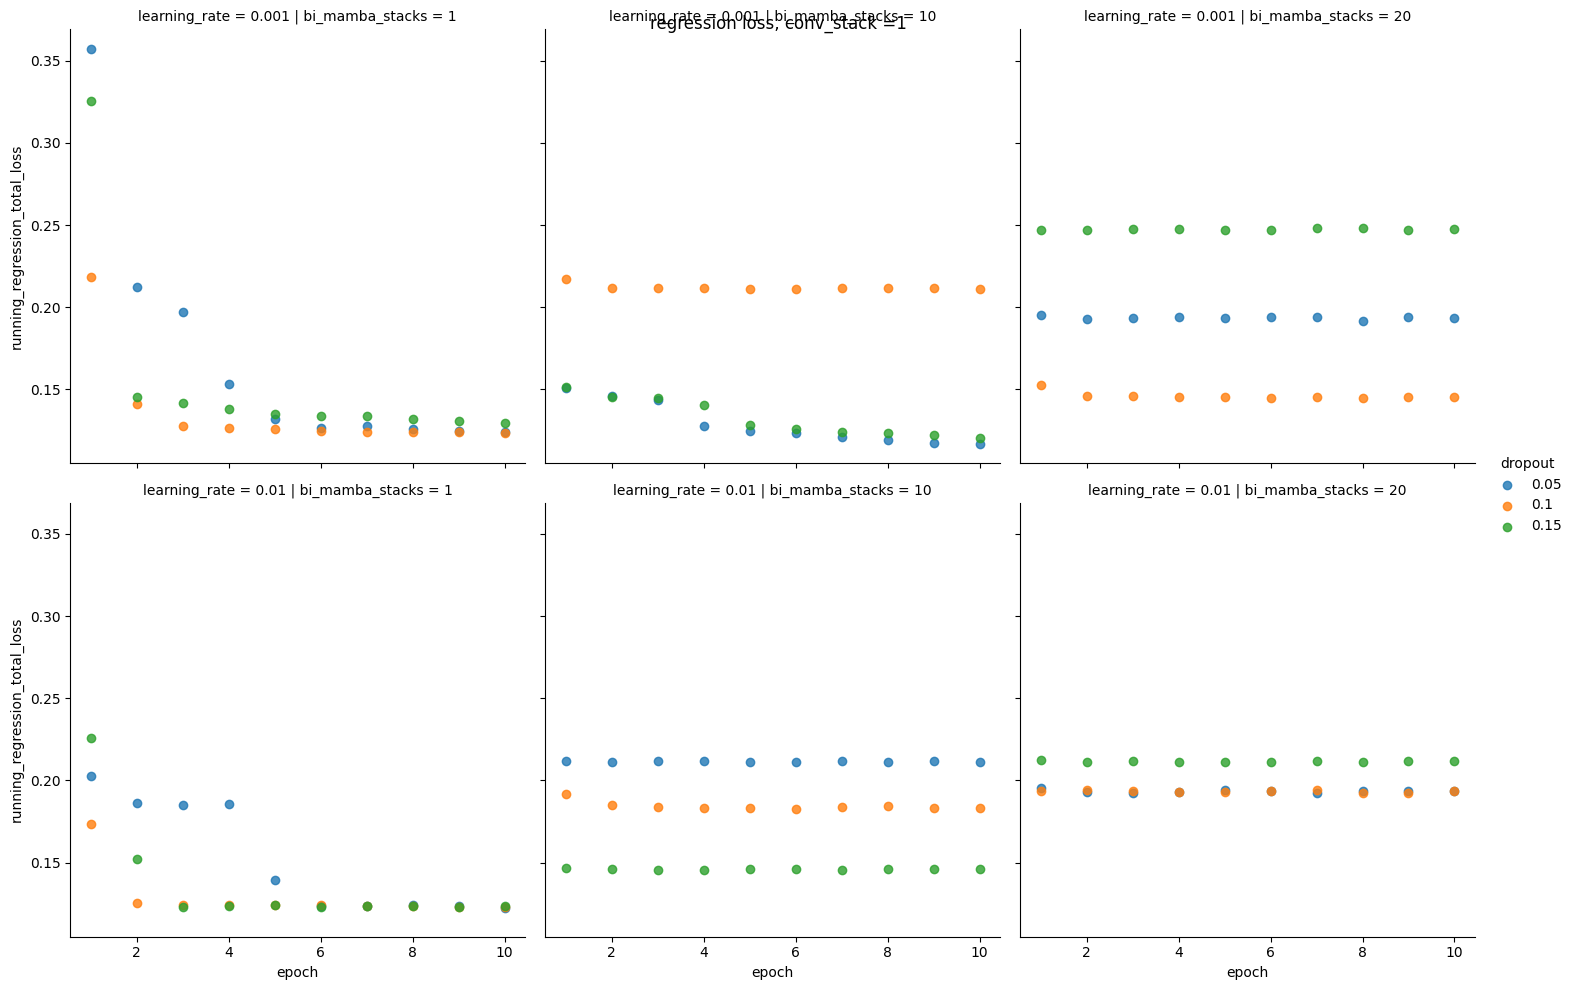

In [53]:
sns.lmplot(
    data=data[data["conv_stack"] == 1],
    x="epoch",
    y="running_regression_total_loss",
    # col_wrap=2,
    hue="dropout",
    col="bi_mamba_stacks",
    row="learning_rate",
    fit_reg=False,
    # scatter=Falsee
    line_kws={'lw': 10},
    # scatter_kws={"s":0}

)
plt.suptitle("regression loss, conv_stack =1 ")
plt.show()

On voit ici qu'un learning rate de 0.001 est crutil et quie le modele n'aprend qu'avec le modèle le plus petit ! Et pour un dropout e 0.1, ainsi ici on voit donc l'effet du dropout qui est assez intéressant.

## Conclusion

Pour la suite, il est nécessaire de refaire les test a la fois en calculant la loss avec les data d'entrainement mais aussi sur des datas que le modele n'a jamais vu afin de vérifier que l'on a pas de surentrainement. De plus, il faudra tester de faire la classification et la régression de maniere séparée afin de voir si les modeles sont plus efficace de cette facon. Enfin on doit sonder les nombres de couches entre 1 et 10 qui sont surement plus intéressante que celle sondés ici le modele étant trop gros pour ce que l'on souhaite mesurer.

Dans un second temps il sera aussi possible de tester de donner des trajectoires purement unique au modèle mais non sous forme de batch ou on peut espérer qu'il utilise les données d'ensemble pour apprendre.